# My approach to the problem statement.

### - Overview of the form and the attributes I used in the form for the survey

With the help of the form I collect the following details of the respondent:

- NAME: Records the name of the respondent.
- AGE: Records the age of the respondent.
- Gender: Records the sex of the respondent.
- State: Records the residing state of the respondent.

Then the respondent was given 6 main categories, in each of these they were to choose an item that they wish to buy.
The categories were as follows:
- Milk / Non-Dairy milk
- Pasta, Noodles, Breakfast and Snack 
- Sauces / Masala /Paste
- Oil/ Fats
- Frozen Food 
- Personal Care


In [1]:
# Doing the necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori  

In [2]:
# Reading the Excel file
customer_data = pd.read_excel('Market Basket Analysis (Responses).xlsx')

In [3]:
# checking the structure of the read excel file
customer_data

,Timestamp,Customer_ID,Name,Age,Gender,State,Milk / Non-Dairy milk,"Pasta, Noodles, Breakfast and Snack",Sauces / Masala /Paste,Oil/ Fats,Frozen Food,Personal Care
0,2021-07-22 16:24:42.839,1000,Abhaya Sharma,21,Female,Delhi,cheese,Pasta,Mayonnaise,Cold pressed mustard oil,Frozen peas,Sanitary napkins
1,2021-07-22 16:32:31.791,1001,Anil kumar,53,Male,Delhi,paneer,Soya chunks,Tomato ketchup,Ghee,Frozen peas,Hairbrush
2,2021-07-22 16:36:40.971,1002,Prachi Verma,20,Female,Delhi,Organic cow milk,Soya chunks,Nutella,Butter,Frozen corn,Shower gel
3,2021-07-22 16:36:44.259,1003,Samridhi Parashar,15,Female,Delhi,Organic cow milk,Pasta,Pasta sauce,Butter,Frozen corn,Hair band
4,2021-07-22 16:37:41.934,1004,Saksham,13,Male,Delhi,Almond milk,Pasta,Mayonnaise,Ghee,Frozen corn,Razor
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2021-07-26 12:11:36.296,1202,Akshay Singh,23,Male,Punjab,Organic cow milk,Noodles,Tomato ketchup,Cold pressed Peanut oil,Mixed vegetables,Wet wipe
203,2021-07-26 12:13:35.058,1203,Ranveer Parashar,19,Male,Haryana,Organic cow milk,Pasta,Thai green curry paste,Ghee,Frozen peas,Mouthwash
204,2021-07-26 12:37:57.141,1204,Anil Sharma,32,Male,Delhi,Organic cow milk,Quinoa,Soy sauce,Cold pressed mustard oil,Frozen peas,Perfume
205,2021-07-26 12:39:35.680,1205,Abhinav Sharma,23,Male,UP,Organic cow milk,Pasta,Mayonnaise,Ghee,Frozen peas,Perfume


In [4]:
# droping the unnecessary column i.e Timestamp here
customer_data.drop(labels='Timestamp', axis=1, inplace=True)

In [5]:
# looking onto the structure of the read excel file after droping the Timestamp column
customer_data.head()

,Customer_ID,Name,Age,Gender,State,Milk / Non-Dairy milk,"Pasta, Noodles, Breakfast and Snack",Sauces / Masala /Paste,Oil/ Fats,Frozen Food,Personal Care
0,1000,Abhaya Sharma,21,Female,Delhi,cheese,Pasta,Mayonnaise,Cold pressed mustard oil,Frozen peas,Sanitary napkins
1,1001,Anil kumar,53,Male,Delhi,paneer,Soya chunks,Tomato ketchup,Ghee,Frozen peas,Hairbrush
2,1002,Prachi Verma,20,Female,Delhi,Organic cow milk,Soya chunks,Nutella,Butter,Frozen corn,Shower gel
3,1003,Samridhi Parashar,15,Female,Delhi,Organic cow milk,Pasta,Pasta sauce,Butter,Frozen corn,Hair band
4,1004,Saksham,13,Male,Delhi,Almond milk,Pasta,Mayonnaise,Ghee,Frozen corn,Razor


In [6]:
# shape of the df (rows, columns)
customer_data.shape

(207, 11)

In [7]:
# to check the non-null count and the datatypes of each column
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Customer_ID                           207 non-null    int64 
 1   Name                                  207 non-null    object
 2   Age                                   207 non-null    object
 3   Gender                                207 non-null    object
 4   State                                 207 non-null    object
 5   Milk / Non-Dairy milk                 207 non-null    object
 6   Pasta, Noodles, Breakfast and Snack   207 non-null    object
 7   Sauces / Masala /Paste                207 non-null    object
 8   Oil/ Fats                             207 non-null    object
 9   Frozen Food                           207 non-null    object
 10  Personal Care                         207 non-null    object
dtypes: int64(1), object(10)
memory u

In [8]:
# checking for any null value in any column in the customer_data dataframe
customer_data.isnull().sum()

# as the columns have no null values(shown below) we need not perform any replacement/droping of those 
# columns/rows that have null values.

# But had been the case were null values were present then insted of deleting the rows that have null values 
# for any column we would have replaced those null values with the mode of those perticular columns as the dataset
# is already small in size deleting those rows would have made it even more smaller

Customer_ID                             0
Name                                    0
Age                                     0
Gender                                  0
State                                   0
Milk / Non-Dairy milk                   0
Pasta, Noodles, Breakfast and Snack     0
Sauces / Masala /Paste                  0
Oil/ Fats                               0
Frozen Food                             0
Personal Care                           0
dtype: int64

In [9]:
# deleting the duplicate rows incase any respondent made more than 1 similar records/entries via form
customer_data.drop_duplicates(inplace=True)

In [10]:
customer_data.shape
# as the shape retained no duplicate were present

(207, 11)

In [11]:
customer_data.columns

Index(['Customer_ID', 'Name', 'Age', 'Gender', 'State',
       'Milk / Non-Dairy milk', 'Pasta, Noodles, Breakfast and Snack ',
       'Sauces / Masala /Paste', 'Oil/ Fats', 'Frozen Food ', 'Personal Care'],
      dtype='object')

#   
## Now let's see what's the gender ratio in the survey 

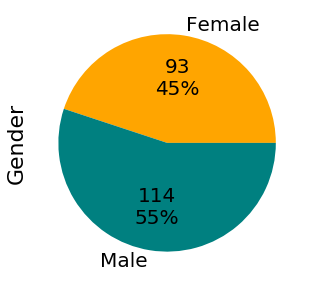

In [12]:
def label_function(val):
    return f'{val / 100 * len(customer_data):.0f}\n{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

customer_data.groupby('Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['orange', 'teal'])
ax1.set_ylabel('Gender', size=22)
plt.show()

## Let's now look at the statewise participation

In [13]:
customer_data.State.value_counts()
# coz of different string formatting we are getting unclear States data 

Delhi             107
Haryana            19
Uttar Pradesh      15
Punjab             14
Uttar pradesh       7
New delhi           6
Bihar               6
Delhi               6
New Delhi           6
UP                  5
Rajasthan           3
DElhi               2
HARYANA             1
South delhi         1
DELHI               1
New Delhi           1
Kerala              1
uttar Pradesh       1
Tamil nadu          1
Haryana             1
new delhi           1
Texas               1
Maharshtra          1
Name: State, dtype: int64

In [14]:
# the string format problem could occur in the following columns as they were to be filled by the respondent itself
str_col = ['Name', 'State']
for col in str_col:
    customer_data[col] = customer_data[col].str.title()

In [15]:
customer_data.State.value_counts()
# still many similar states are filled with different names which has to be corrected 

Delhi             110
Uttar Pradesh      22
Haryana            20
Punjab             14
New Delhi          13
Bihar               6
Delhi               6
Up                  5
Rajasthan           3
South Delhi         1
New Delhi           1
Uttar Pradesh       1
Kerala              1
Tamil Nadu          1
Haryana             1
Texas               1
Maharshtra          1
Name: State, dtype: int64

In [16]:
customer_data.State.unique()

array(['Delhi', 'Delhi ', 'New Delhi', 'Uttar Pradesh', 'Haryana',
       'New Delhi ', 'Maharshtra', 'Uttar Pradesh ', 'Punjab', 'Texas',
       'Bihar', 'South Delhi', 'Up', 'Haryana ', 'Rajasthan',
       'Tamil Nadu', 'Kerala'], dtype=object)

In [17]:
customer_data.State.replace({'Delhi ':"Delhi",
                             'New Delhi ':"Delhi",
                             "New Delhi":"Delhi" ,
                             'Uttar Pradesh ':"Uttar Pradesh",
                             'Haryana ':"Haryana",           
                             "Uttar pradesh":'Uttar Pradesh', 
                             "Up":'Uttar Pradesh',     
                             "South Delhi":'Delhi' }, inplace=True)         

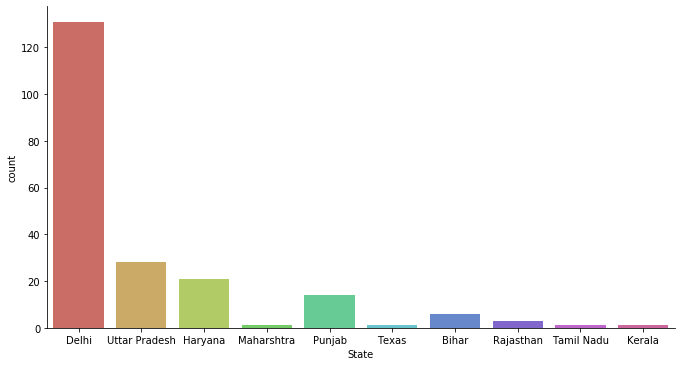

In [18]:
sns.catplot(x= 'State', data=customer_data, kind="count",palette="hls", height=5, aspect=15/8)

#### From the above graph we could say that the major data contribution for the survey is from
- Delhi

#### Uttar Pradesh, Haryana, Punjab & Bihar contribute way less than Delhi 
#### Rest of the sates have barely one single entry.

####  
####  

## Now that the States & Names are correctly string formatted we can now move on to the process of applying "Apriori Algorithm"

In [19]:
# we are adding a new column to the existing dataframe that will have all the items selected by that customer. 
customer_data['customer_basket'] = customer_data[customer_data.columns[5:]].apply(
    lambda x: ','.join(x.astype(str)), axis=1)

In [20]:
customer_data.customer_basket[0]

'cheese,Pasta,Mayonnaise,Cold pressed mustard oil,Frozen peas,Sanitary napkins'

In [21]:
# now grouping by the Customer_ID to get a list of items each customer has bought
customer_basket_data = customer_data.groupby(['Customer_ID'])['customer_basket'].apply(lambda x: list(x))

In [22]:
customer_basket_data

Customer_ID
1000    [cheese,Pasta,Mayonnaise,Cold pressed mustard ...
1001    [paneer,Soya chunks,Tomato ketchup,Ghee,Frozen...
1002    [Organic cow milk,Soya chunks,Nutella,Butter,F...
1003    [Organic cow milk,Pasta,Pasta sauce,Butter,Fro...
1004    [Almond milk,Pasta,Mayonnaise,Ghee,Frozen corn...
                              ...                        
1202    [Organic cow milk,Noodles,Tomato ketchup,Cold ...
1203    [Organic cow milk,Pasta,Thai green curry paste...
1204    [Organic cow milk,Quinoa,Soy sauce,Cold presse...
1205    [Organic cow milk,Pasta,Mayonnaise,Ghee,Frozen...
1206    [Organic cow milk,Noodles,Pasta sauce,Ghee,Fro...
Name: customer_basket, Length: 207, dtype: object

In [23]:
# now we are creating a list of lists, of all the items that each customer has bought
# this list will be fed in the Apriori Algorithm to find the most bought combinations of items
transactions = customer_basket_data.values.tolist()
transactions

[['cheese,Pasta,Mayonnaise,Cold pressed mustard oil,Frozen peas,Sanitary napkins'],
 ['paneer,Soya chunks,Tomato ketchup,Ghee,Frozen peas,Hairbrush'],
 ['Organic cow milk,Soya chunks,Nutella,Butter,Frozen corn,Shower gel'],
 ['Organic cow milk,Pasta,Pasta sauce,Butter,Frozen corn,Hair band'],
 ['Almond milk,Pasta,Mayonnaise,Ghee,Frozen corn,Razor'],
 ['Organic cow milk,Pasta,Mayonnaise,Butter,Frozen corn,Mouthwash'],
 ['paneer,Noodles,Soy sauce,Butter,Frozen kebab,Razor'],
 ['milk cream,Pasta,Mayonnaise,Cold pressed Peanut oil,Frozen corn,Sanitary napkins'],
 ['Organic cow milk,Soya chunks,Nutella,Ghee,Frozen corn,Shower gel'],
 ['cheese,Pasta,Pasta sauce,Butter,Frozen corn,Perfume'],
 ['soya milk,Quinoa,Thai green curry paste,Cold pressed Peanut oil,Mixed vegetables,Razor'],
 ['paneer,Soya chunks,Tomato ketchup,Ghee,Mixed vegetables,Perfume'],
 ['Organic cow milk,Soya chunks,Tomato ketchup,Butter,Frozen corn,Sanitary napkins'],
 ['cheese,Pasta,Tomato ketchup,Butter,Frozen corn,Sunscre

In [24]:
rules= apriori(transactions= transactions, min_support=0.009, 
               min_confidence = 0.009, min_lift=1, min_length=2, max_length=3) 

results = list(rules)
results

[RelationRecord(items=frozenset({'Almond milk,Quinoa,Thai green curry paste,Butter,Frozen kebab,Shower gel'}), support=0.00966183574879227, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Almond milk,Quinoa,Thai green curry paste,Butter,Frozen kebab,Shower gel'}), confidence=0.00966183574879227, lift=1.0)]),
 RelationRecord(items=frozenset({'Organic cow milk,Noodles,Tomato ketchup,Ghee,Frozen peas,Sanitary napkins'}), support=0.00966183574879227, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Organic cow milk,Noodles,Tomato ketchup,Ghee,Frozen peas,Sanitary napkins'}), confidence=0.00966183574879227, lift=1.0)]),
 RelationRecord(items=frozenset({'Organic cow milk,Soya chunks,Tomato ketchup,Cold pressed Peanut oil,Frozen peas,Razor'}), support=0.00966183574879227, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Organic cow milk,Soya chunks,Tomato ketchup,Cold pressed Peanut oil,Froz

In [25]:
# Now extracting supports, confidences and lifts for corresponding items 
items = [tuple(result[2][0][1])[0] for result in results]
supports    = [result[1] for result in results]
confidences = [result[2][0][2] for result in results]
lifts       = [result[2][0][3] for result in results]

In [26]:
# making a df out of the extracted parameters 
popular_basket = pd.DataFrame(list(zip(items, supports, confidences, lifts)), columns=["item_basket", 
                                                                       "supports", "confidences", "lifts"])

In [27]:
popular_basket

,item_basket,supports,confidences,lifts
0,"Almond milk,Quinoa,Thai green curry paste,Butt...",0.009662,0.009662,1.0
1,"Organic cow milk,Noodles,Tomato ketchup,Ghee,F...",0.009662,0.009662,1.0
2,"Organic cow milk,Soya chunks,Tomato ketchup,Co...",0.009662,0.009662,1.0
3,"Organic cow milk,Soya chunks,Tomato ketchup,Gh...",0.009662,0.009662,1.0
4,"cheese,Pasta,Pasta sauce,Butter,Frozen corn,Pe...",0.009662,0.009662,1.0
5,"milk cream,Pasta,Pasta sauce,Butter,Frozen cor...",0.009662,0.009662,1.0
6,"paneer,Pasta,Mayonnaise,Butter,Frozen kebab,Ha...",0.009662,0.009662,1.0
7,"paneer,Soya chunks,Tomato ketchup,Ghee,Frozen ...",0.009662,0.009662,1.0


#   
## Showing the most popular bought combinations of items
### Results

In [28]:
for i in range(0, len(popular_basket.item_basket)):
    print(f"{popular_basket.item_basket[i]}\n")

Almond milk,Quinoa,Thai green curry paste,Butter,Frozen kebab,Shower gel

Organic cow milk,Noodles,Tomato ketchup,Ghee,Frozen peas,Sanitary napkins

Organic cow milk,Soya chunks,Tomato ketchup,Cold pressed Peanut oil,Frozen peas,Razor

Organic cow milk,Soya chunks,Tomato ketchup,Ghee,Frozen peas,Razor

cheese,Pasta,Pasta sauce,Butter,Frozen corn,Perfume

milk cream,Pasta,Pasta sauce,Butter,Frozen corn,Wet wipe

paneer,Pasta,Mayonnaise,Butter,Frozen kebab,Hand lotion

paneer,Soya chunks,Tomato ketchup,Ghee,Frozen peas,Hairbrush



###    
## From the insights drawn above we can say that  
- Almond milk, Organic cow milk, cheese, milk cream, paneer
- Quinoa, Noodles, Soya chunks, Pasta
- Thai green curry paste, Tomato ketchup, Pasta sauce, Mayonnaise
- Butter, Ghee, Cold pressed Peanut oil
- Frozen kebab, Frozen peas, Frozen corn
- Shower gel, Sanitary napkins, Razor, Perfume, Wet wipe, Hand loion, Hairbrush

Are the most popular items in their respective categories for the most common item baskets in the response.

# Time to visualize
### Looking at items with "hue" made to "State" makes no sense here as the statewise response is quite biased and hence will give us no correct insights

### But "hue" set to "Gender" can help us to some extent to understand the  gender preferences for varies product categories.

#### We can do the following to know that (But remember that there is a difference of 21 as males are more than females)

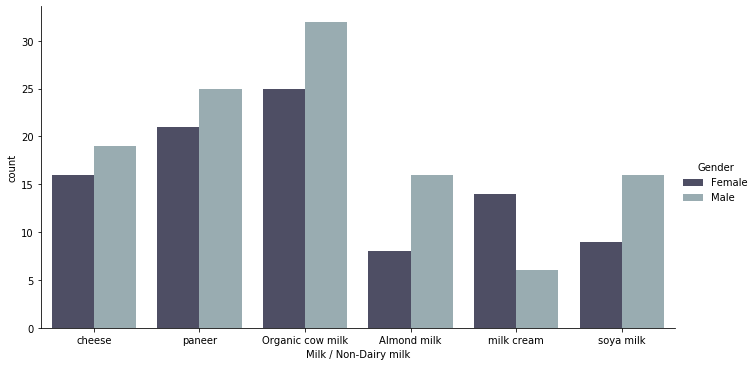

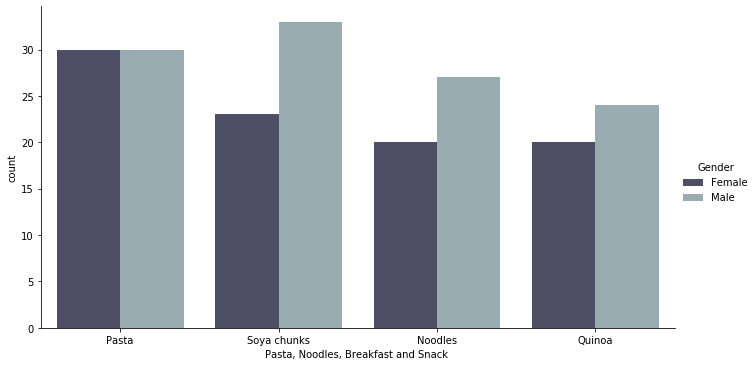

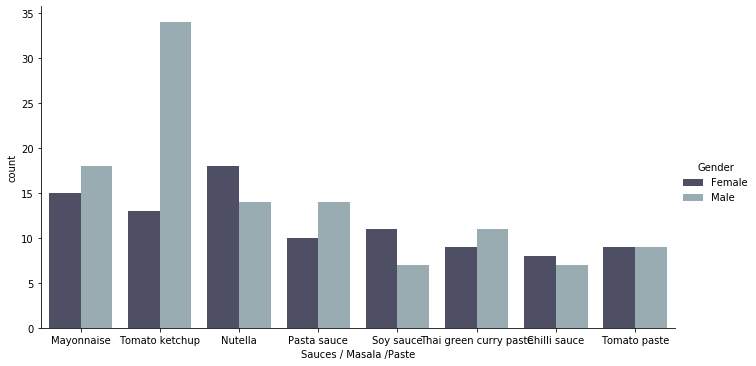

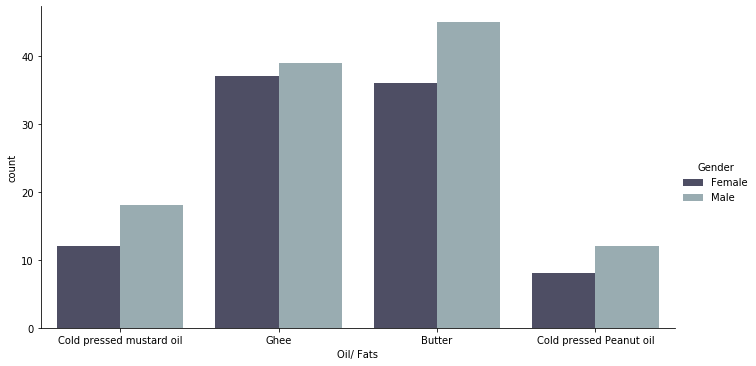

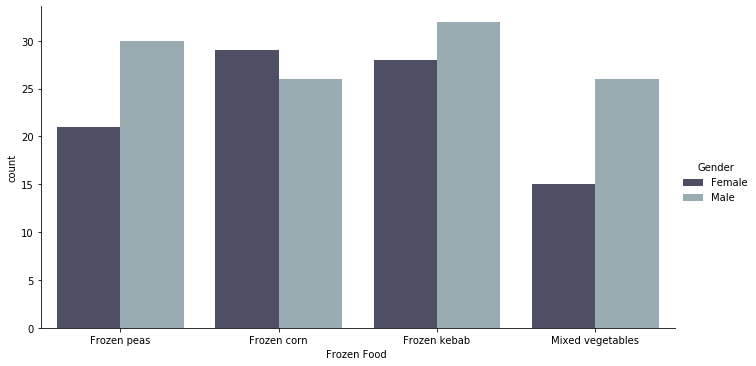

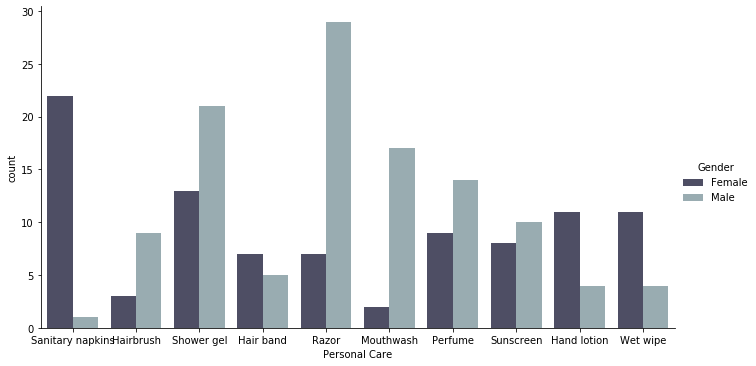

In [29]:
cat_cols = ['Milk / Non-Dairy milk', 'Pasta, Noodles, Breakfast and Snack ',
       'Sauces / Masala /Paste', 'Oil/ Fats', 'Frozen Food ', 'Personal Care']

for cat in cat_cols:
    sns.catplot(x=cat, data=customer_data, kind='count', palette="bone", hue="Gender", height=5, aspect=15/8)

## Now let's visualize the general popularity of products in each category..

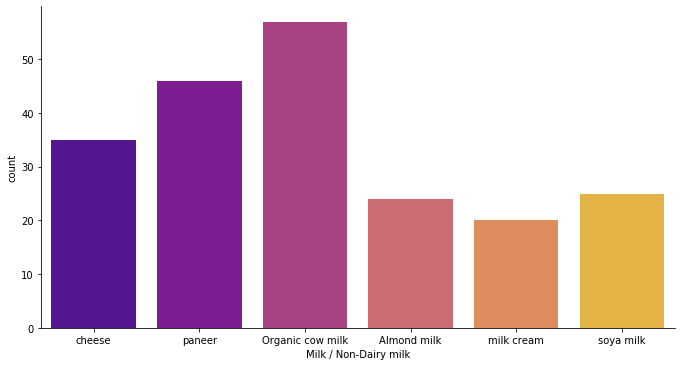

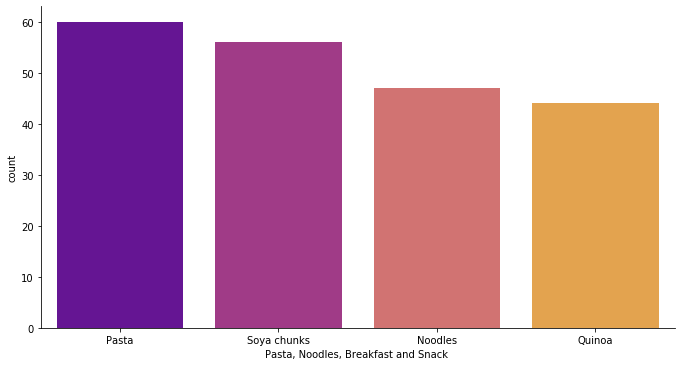

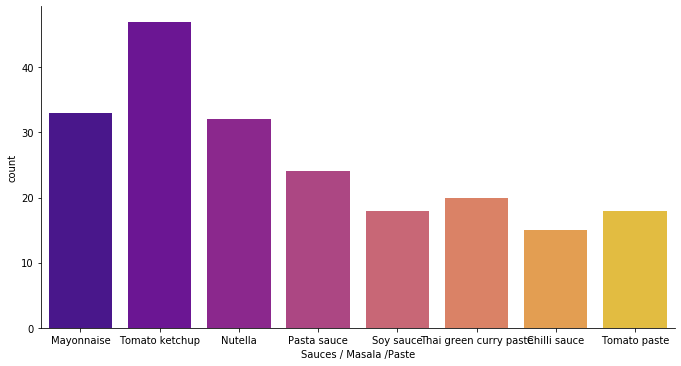

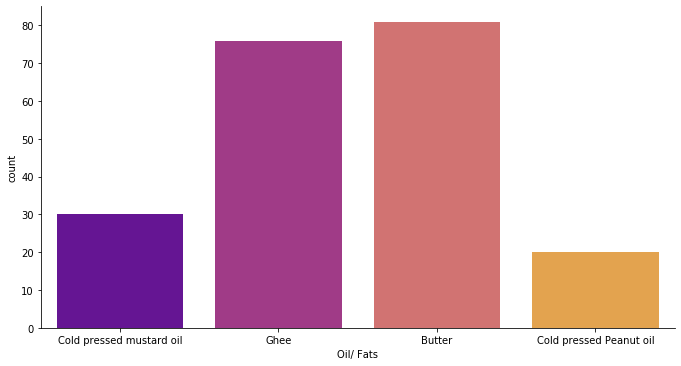

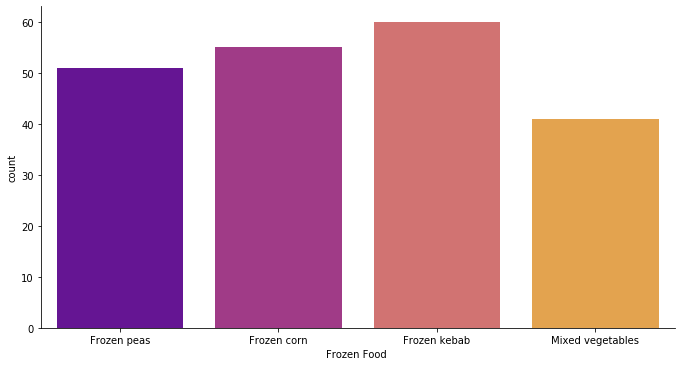

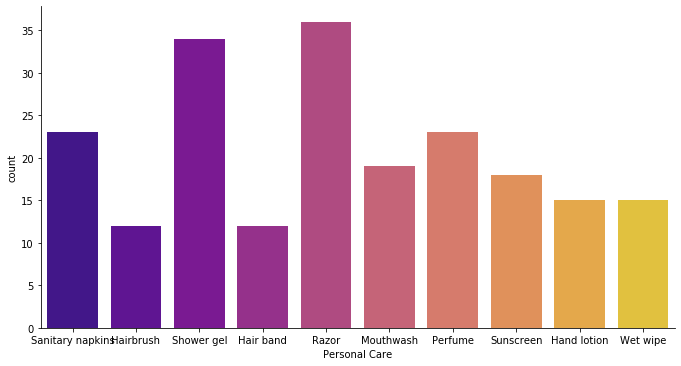

In [30]:
for cat in cat_cols:
    sns.catplot(x=cat, data=customer_data, kind='count', palette="plasma", height=5, aspect=15/8)

## From the visualization done above we can say that 
- Organic Cow Milk is most popular in 'Milk / Non-Dairy milk' category
- Pasta is most popular in 'Pasta, Noodles, Breakfast and Snack ' category
- Tomato ketchup is most popular in 'Sauces / Masala /Paste' category
- Butter is most popular in 'Oil/Fats' category
- Frozen kebab is most popular in 'Frozen Food' category
- Razor is most popular in 'Personal Care' category